# 1. Trichromacy 


<img src="https://www.researchgate.net/profile/Geert-Verhoeven-2/publication/306264840/figure/fig5/AS:614364306497538@1523487273429/The-setup-of-a-colour-matching-experiment.png" width="100%" style="margin-left:auto; margin-right:auto">  

Load the file colMatch.mat in my Python.  The function returns a 3-vector containing the observer's knob settings" the intensities of each of the primaries that, when mixed together, appear identical to the test light. 

In [23]:
import scipy.io as spio
from trichromacy import human_color_matcher
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import seaborn as sn
import pandas as pd
import numpy.matlib
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
ColMatch=spio.loadmat('/Users/akihitomaruya/Desktop/Courses/Class2021/Fall/Python/DataScience/Final_project/colMatch.mat')
ColMatch.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Cones', 'P', 'eP', 'wl'])

This file contains matrices and vectors related to the color
matching experiment presented. In particular, the variable P is an N $\times$ 3 matrix containing wavelength spectra for three "primary" lights, that could be used in a colormatching experiment. For these problems N = 31, corresponding to samples of the visible wavelength spectrum from 400nm to 700nm in increments of 10nm.
The function humanColorMatcher.p simulates a normal human observer in a color matching
experiment. 

In [7]:
print(ColMatch['P'])

[[0.385171 0.070337 0.067121]
 [0.471853 0.072987 0.063994]
 [0.493316 0.067948 0.060949]
 [0.497136 0.063878 0.066082]
 [0.488206 0.068092 0.069151]
 [0.476158 0.068396 0.0786  ]
 [0.463775 0.071183 0.08961 ]
 [0.445076 0.081728 0.111547]
 [0.421097 0.095957 0.143665]
 [0.396976 0.113168 0.193252]
 [0.374379 0.132417 0.277898]
 [0.343796 0.158213 0.397022]
 [0.295302 0.207884 0.499834]
 [0.25081  0.292901 0.552137]
 [0.229799 0.393461 0.567022]
 [0.227681 0.475133 0.558777]
 [0.22     0.532027 0.539366]
 [0.214699 0.577602 0.51655 ]
 [0.228228 0.613082 0.483869]
 [0.247012 0.63851  0.44171 ]
 [0.25985  0.656375 0.395269]
 [0.269687 0.671135 0.362422]
 [0.266512 0.681734 0.348063]
 [0.267986 0.693257 0.342001]
 [0.284767 0.704632 0.338504]
 [0.328625 0.711578 0.334981]
 [0.391731 0.720305 0.344302]
 [0.455403 0.728265 0.36425 ]
 [0.49943  0.73434  0.386038]
 [0.523844 0.737723 0.404147]
 [0.534261 0.745306 0.418349]]


## Question A
Create a test light with an arbitrary wavelength spectrum, by generating a random
column vector with 31 positive components. Use humanColorMatcher to "run an experiment", asking the "human" to set the intensities of the three primaries in P to match the appearance of the test light.
Compute the 31-dimensional wavelength spectrum of this combination of primaries, plot
it together with the original light spectrum, and explain why the two spectra are so
different, even though they appear the same to the human.

Knob setting [[ 0.91956029]
 [-0.34980398]
 [ 0.88134166]]


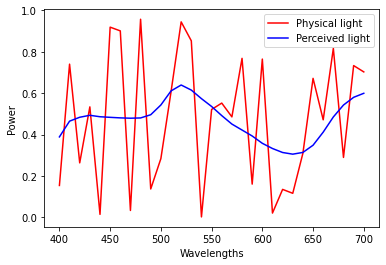

In [17]:
np.random.seed(12)
# a random light
test_light=np.random.rand(31,1)
# primaries 
primaries=ColMatch['P']
# wavelength spectrum at each point
wavelengths=np.arange(400,701,step=10).reshape(-1,1)
#%% Experiment
# Run an experiment and get knob settings 
knobs=human_color_matcher(test_light,primaries)
print('Knob setting',knobs)
# derive the combined light that the observer perceived 
perceived_light=primaries@knobs
#%% Visualize
# visualize perceived light and physical light (test_light) 
plt.figure()
test=plt.plot(wavelengths,test_light,'r-',label='Physical light')
p=plt.plot(wavelengths,perceived_light,'b-',label='Perceived light')
plt.xlabel('Wavelengths')
plt.ylabel('Power')
plt.legend() 

They look different but these two lights will generate the same color for human because three cones will have the same responses. 

# Question B
Your colleague down the hall, Dr. Evoprimary, proudly tells you about a new colormatching
configuration using primaries derived from pigments that were most prevalent
in the environment of our evolutionary ancestors. You respond that this is a beautiful
concept, but seems unlikely to offer new insights into human trichromacy, since you can
precisely predict the color matches that will be obtained with these new primaries. Dr.
E allows you to measure the wavelength spectra of the new primaries (stored in variable
eP). Derive (write math, and explain logic) an expression for the color-matching matrix
(3x31, maps a light to 3 knob settings) that predicts matches that would be obtained in
Dr E's lab. Compute this matrix, making use of humanColorMatcher.p with your own
primaries, P. Check, for a random test light, that the predicted mixture of eP primaries
matches (produces the same knob settings when tested with your primaries, P). If it does
not, explain why.

## Mathmatical expression for the color matching matrix
Suppose $\boldsymbol{H_e}$ is the color matching matrix (that maps a light to 3 knob settings), $\boldsymbol{P_e}$ is the primary in Dr. E's lab. ($\boldsymbol{H}$ and $\boldsymbol{P}$ for our lab), and $\overrightarrow{l}$ is the . 
\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{H_e}\overrightarrow{l} \rightarrow \text{knob settings}
    \end{array}
\end{equation*}

\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{P_e}\boldsymbol{H_e}\overrightarrow{l} \sim \overrightarrow{l} 
    \end{array}
\end{equation*}
$\boldsymbol{P_e}\boldsymbol{H_e}\overrightarrow{l}$ will be perceived as $\overrightarrow{l}$. We can do the same experiment in our lab. Since using the perceptually equal light, $\boldsymbol{P_e}\boldsymbol{H_e}\overrightarrow{l}$, will produce the same knob setting as $\overrightarrow{l}$,
\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{H}\overrightarrow{l}=\boldsymbol{H}\boldsymbol{P_e}\boldsymbol{H_e}\overrightarrow{l}
    \end{array}
\end{equation*}
Thus, 
\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{H}=\boldsymbol{H}\boldsymbol{P_e}\boldsymbol{H_e}
      \\\\
      \boldsymbol{H_e}=(\boldsymbol{H}\boldsymbol{P_e})^{-1}\boldsymbol{H}
    \end{array}
\end{equation*}



In [19]:
# Primary from Dr.E's lab

eP=ColMatch['eP']

# Expresssion
# H_e = (HP_e)^(-1)H
# Let's figure out H by feeding impulse responses
impulse=np.identity(len(eP))
H=human_color_matcher(impulse,primaries)
H_e=inv(H@eP)@H

# check if it gives the same knob setting as our lab
knob_E=H_e@test_light
print('Our knob setting',knobs)
print('Dr.E lab knob setting',knob_E)
# knob setting should be different since the primary is different 

Our knob setting [[ 0.91956029]
 [-0.34980398]
 [ 0.88134166]]
Dr.E lab knob setting [[ 2.55722742e+16]
 [ 1.09595461e+16]
 [-3.65318203e+16]]


# Question C
The variable Cones contains (in the rows) approximate spectral sensitivities of the
three color photoreceptors (cones) in the human eye: Cones(1,:) is for the L (long wavelength, or red) cones, Cones(2,:) the M (green) cones, and Cones(3,:) the S
(blue) cones. Applying the matrix Cones to any light ~$\overrightarrow{l}$ yields a 3-vector containing the average number of photons absorbed by that cone (try plot(Cones') to visualize them!). Verify that the cones provide a physiological explanation for the matching experiment, in that the cone absorptions are equal for any pair of lights that are perceptually matched. First, do this informally, by checking that randomly generated lights and their corresponding 3-primary matching lights produce equal cone absorptions. Then, provide a few lines of matlab code that provide a more mathematical demonstration, along with an extended comment explaining your reasoning using concepts from linear algebra. 

In [22]:
Cones=ColMatch['Cones'];
# First, do this informally, by check
#ing that randomly generated lights and their corresponding 3-primary matching lights
#produce equal cone absorptions.
# 10 random lights
test_light=np.random.rand(31,10)
cones_responses=np.round(Cones@test_light,5)
# Run an experiment and get knob settings 
knobs=H@test_light
# derive the combined light that the observer perceived 
perceived_light=primaries@knobs
pri_cones_responses=np.round(Cones@perceived_light,5)

print(np.equal(cones_responses,pri_cones_responses))

# They have the same responses

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]


## Mathmatical explanation 
Suppose that $\boldsymbol{C}$ is the cone absorption matrix, of which $\boldsymbol{C}\overrightarrow{l}$ gives three cone responses, and $\boldsymbol{H_{cone}}$ a matrix where
\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{P}\boldsymbol{H_{cone}}\overrightarrow{l} \sim \overrightarrow{l} 
    \end{array}
\end{equation*}
Now, if this primary matching light (perceived) produces the same cone responses, 
\begin{equation*}
    \begin{array}{lcl}
      \boldsymbol{C} \boldsymbol{P}\boldsymbol{H_{cone}}\overrightarrow{l} = \boldsymbol{C}\overrightarrow{l}
      \\
      \boldsymbol{H_{cone}}=(\boldsymbol{C} \boldsymbol{P})^{-1}\boldsymbol{C}
    \end{array}
\end{equation*}
So, if this $\boldsymbol{H_{cone}}$ is the same as our color matching matrix $\boldsymbol{H}$, it is evident that the cones provide a physiological
explanation for the matching experiment, in that the cone absorptions are equal
for any pair of lights that are perceptually matched.

In [23]:
H_cones=inv(Cones@primaries)@Cones

print(np.equal(np.round(H,5),np.round(H_cones,5)))
# H and H_cones are the same. 

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True]]


# 2. Polynomial regression
Load the  le regress1.mat into your MATLAB or Jupyter notebook environment. Plot variable Y as a function of X. Find a least-squares fit of the data with polynomials of order 0 (a constant), 1 (a line, parameterized by intercept and and slope), 2, 3, 4, and 5. [Compute this using svd and basic linear algebra manipulations that you've learned in class!] On a separate graph, plot the squared error as a function of the order of
the polynomial. Which fit do you think is "best"? Explain.

In [28]:
Data=spio.loadmat('/Users/akihitomaruya/Desktop/Courses/Class2021/Fall/Math tool for cognitive and neural science/hw2-files/regress1.mat')
Data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Sep 28 12:51:08 2021',
 '__version__': '1.0',
 '__globals__': [],
 'x': array([[-1.48967789],
        [-1.47081333],
        [-1.3112663 ],
        [-1.29405235],
        [-1.09782805],
        [-1.0283069 ],
        [-0.95743589],
        [-0.95044998],
        [-0.7302983 ],
        [-0.73009776],
        [-0.70807171],
        [-0.70030376],
        [-0.65939985],
        [-0.60231933],
        [-0.59995517],
        [-0.58562541],
        [-0.57708688],
        [-0.56445512],
        [-0.43130926],
        [-0.36800673],
        [-0.30255732],
        [-0.24378349],
        [-0.22738049],
        [-0.11317496],
        [-0.09988297],
        [-0.00484942],
        [ 0.01166854],
        [ 0.05138768],
        [ 0.0666838 ],
        [ 0.15218886],
        [ 0.17830406],
        [ 0.24705815],
        [ 0.47264227],
        [ 0.4871379 ],
        [ 0.48814413],
        [ 0.58234165],
        [ 0.65680187],
      

In [29]:
def poly_reg(x,y,pol_order,vis=0,x_new=np.empty(1),y_new=np.empty(1)):
    """ This function provides polynomial regressions of given order. You can visualize
    the model with your data as well as prediction of unknown points"""
    X=np.zeros((len(x),pol_order+1))
    X_new=np.zeros((len(x_new),pol_order+1))
    for pp in range(pol_order+1):
        X[:,[pp]]=x.reshape(-1,1)**pp
        X_new[:,[pp]]=x_new.reshape(-1,1)**pp
    # get svd 
    u, s, vh = np.linalg.svd(X, full_matrices=True)
    # make diagonal matrix for s
    S=np.zeros(X.shape)
    S[:X.shape[1],:X.shape[1]]=np.diag(s)
    psued_S=np.linalg.pinv(S);
    # Compute B0
    B=vh.T@psued_S@u.T@y
    squared_error=np.sum((y-X@B)**2)
    y_hat=X@B;
    y_new_hat=X_new@B;
    pred_error=np.sum((y_new-y_new_hat)**2)
    if vis==1:
        plt.figure()
        plt.scatter(x,y)
        plt.plot(x,y_hat,color='red')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'{pol_order} Order')
        plt.show()
    return y_hat,squared_error,y_new_hat,pred_error

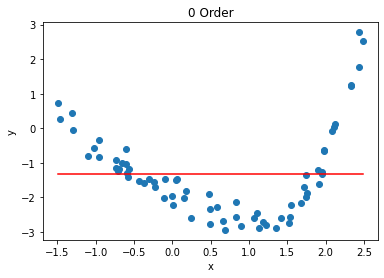

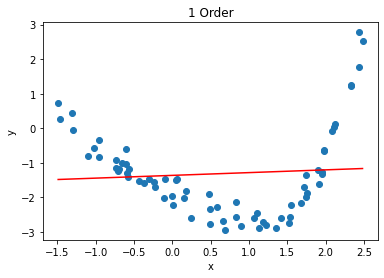

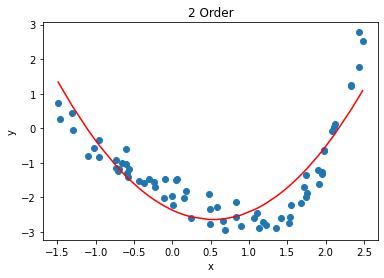

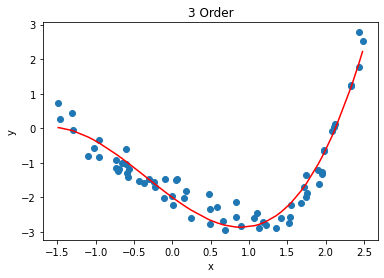

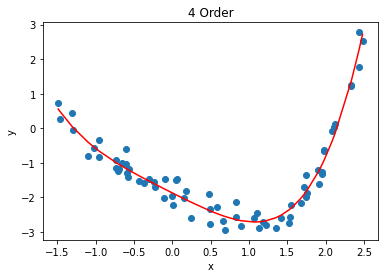

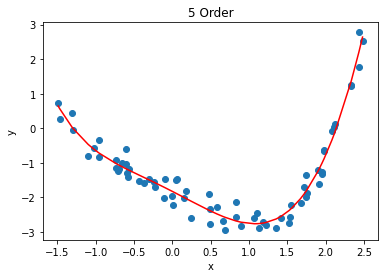

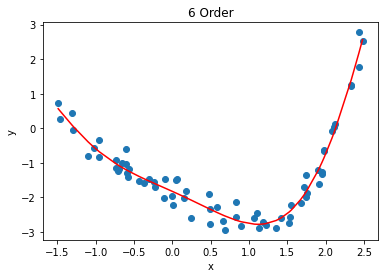

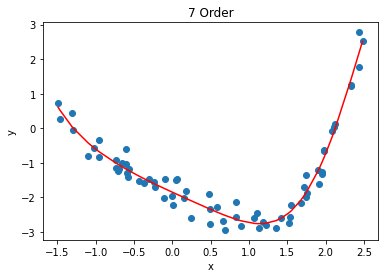

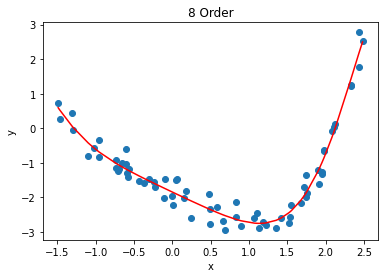

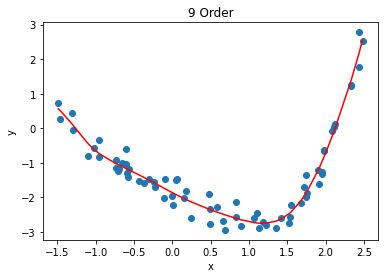

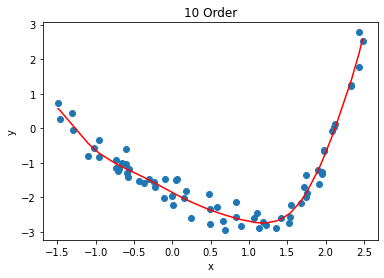

In [30]:
# Plot the polynomial regressions
max_order=10;
Y_hat=[];Errors=[];
for ii in range(max_order+1):
    y_hat,error,_,_=poly_reg(Data['x'],Data['y'],ii,1) 
    Y_hat.append(y_hat)
    Errors.append(error)


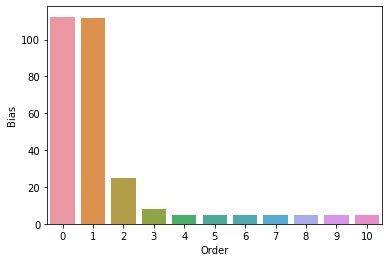

In [31]:
#%% Plot errors (Bias)
Errors=pd.DataFrame({'Bias':Errors,'Order':np.arange(0,11,step=1)});
sn.barplot(x='Order',y='Bias',data=Errors)

In [36]:
#%% Plot cross varidation score to estimate the variance 
# Finally, we can pick the order considering Bias-Variance Trade-off!!
num_fold=10
Data_dic={'x': Data['x'].reshape(-1),'y': Data['y'].reshape(-1)}
Data_pd=pd.DataFrame(Data_dic)
Pred_error_all=[]
for ii in range(max_order+1):
    pred_error=0
    for ff in range(num_fold):
        ind=np.arange(int(len(Data_pd)/num_fold)*ff,int(len(Data_pd)/num_fold)*(ff+1))
        Train_x=Data_pd['x'].drop(ind).values
        Train_y=Data_pd['y'].drop(ind).values
        Test=Data_pd.iloc[ind]
        y_hat,squared_error,y_new_hat,pred_error=poly_reg(Train_x,Train_y,ii,0,Test['x'].values,Test['y'].values)
        pred_error+=pred_error
    Pred_error_all.append(pred_error)
Errors['Variance']=Pred_error_all
print(Errors)
# It is better to melt down to visualize bias and variance at the same time. 
Errors_reshaped=pd.melt(Errors, id_vars='Order', var_name=['Error type'], value_name='Errors')
print(Errors_reshaped)

          Bias  Order     Variance
0   112.456441      0   139.617752
1   111.852146      1   219.132927
2    24.659442      2    66.567635
3     8.251140      3    16.641866
4     4.972459      4     4.971076
5     4.870728      5    10.237490
6     4.780353      6    17.642750
7     4.748786      7    33.162583
8     4.744904      8    21.020673
9     4.700163      9   321.248241
10    4.695935     10  1255.403249
    Order Error type       Errors
0       0       Bias   112.456441
1       1       Bias   111.852146
2       2       Bias    24.659442
3       3       Bias     8.251140
4       4       Bias     4.972459
5       5       Bias     4.870728
6       6       Bias     4.780353
7       7       Bias     4.748786
8       8       Bias     4.744904
9       9       Bias     4.700163
10     10       Bias     4.695935
11      0   Variance   139.617752
12      1   Variance   219.132927
13      2   Variance    66.567635
14      3   Variance    16.641866
15      4   Variance     4.971076
16

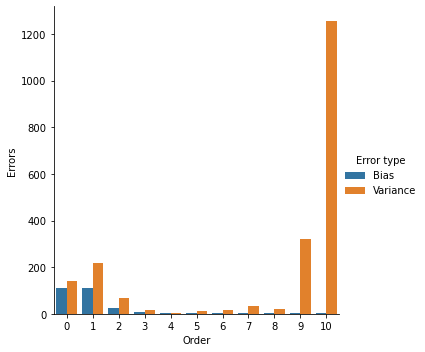

In [35]:
sn.factorplot(x='Order', y='Errors', hue='Error type', data=Errors_reshaped, kind='bar')
# Polynomial order 4 has the lowest bias and variance!!

# 3. Constrained Least Squares Optimization
Load the file constrainedLS.mat into MATLAB or Jupyter notebook. This contains an N $\times$ 2 data matrix, data, whose columns correspond to horizontal and vertical coordinates of a set of 2D data points, ~$\overrightarrow{d_n}$. It also contains
a 2-vector $\overrightarrow{w}$. Consider a constrained optimization problem:
\begin{equation}
    \begin{array}{lcl}
    \min\limits_{\overrightarrow{\beta}} \sum\limits_{n}(\overrightarrow{\beta}^T\overrightarrow{d_n})^2 
    \end{array}
\end{equation}
s.t.            $\overrightarrow{\beta}^T\overrightarrow{w}=1$



(a) Rewrite the optimization problem in matrix form. Then rewrite the problem in terms of
a new optimization variable, ~ $\tilde{\beta}$(i.e. 'beta tilde', a linear transformation of $\overrightarrow{\beta}$), such that the quantity to be minimized is now $||\tilde{\beta}||^2$. Note: you must also rewrite the constraint in terms of $\tilde{\beta}$.

<img src="https://raw.githubusercontent.com/AkihitoM/Final-Project/main/Fig/Fig2.png" width="50%" style="margin-left:auto; margin-right:auto"> 

Let $\boldsymbol{D}$ be a matrix that contains 2D data points such that $\boldsymbol{D}=\begin{bmatrix}
| & |  \\
d_{1} & d_{2} \\
| & |  \\
\end{bmatrix}$
Then, I can rewrite the equation in matrix form
\begin{equation}
    \begin{array}{lcl}
    \min\limits_{\overrightarrow{\beta}} ||\boldsymbol{D}\overrightarrow{\beta}||^2
    \end{array}
\end{equation}
By using SVD,
\begin{equation}
    \begin{array}{lcl}
    \min\limits_{\overrightarrow{\beta}} ||\boldsymbol{D}\overrightarrow{\beta}||^2
    =\min\limits_{\overrightarrow{\beta}} ||\boldsymbol{usv^T}\overrightarrow{\beta}||^2
    \end{array}
\end{equation}
Now, $\overrightarrow{u}$ is a rotational matrix and since the rotation doesn't affect the length, 
\begin{equation}
    \begin{array}{lcl}
    \min\limits_{\overrightarrow{\beta}} ||\boldsymbol{D}\overrightarrow{\beta}||^2
    &=&\min\limits_{\overrightarrow{\beta}} ||\boldsymbol{sv^T}\overrightarrow{\beta}||^2
    \\
    &=&\min\limits_{\overrightarrow{\beta}} ||\boldsymbol{s}\overrightarrow{\beta^{*}}||^2
    \end{array}
\end{equation}
such that $\overrightarrow{\beta^{*}}=\boldsymbol{v^T}\overrightarrow{\beta}$. Here, $\boldsymbol{v^T}\overrightarrow{\beta}$ rotates $\overrightarrow{\beta}$.
\begin{equation}
    \begin{array}{lcl}
    \min\limits_{\overrightarrow{\beta}} ||\boldsymbol{D}\overrightarrow{\beta}||^2
    &=&\min\limits_{\overrightarrow{\beta}} ||\tilde{\beta}||^2
    \end{array}
\end{equation}
such that $\tilde{\beta}=\boldsymbol{s}^*\overrightarrow{\beta^{*}}$ where $\boldsymbol{s}^*$ is the first two rows of $\boldsymbol{s}$. Here, it is streching and squeezing the sapce by $\boldsymbol{s}^*$. Rewrite the constraint in terms of $\tilde{\beta}$. 
Suppose that $\overrightarrow{w^*}=\boldsymbol{v^T}\overrightarrow{w}$
\begin{equation}
    \begin{array}{lcl}
    \overrightarrow{\beta^{*}}^{T}\overrightarrow{w^*} &=& (\boldsymbol{v^T}\overrightarrow{\beta})^T \boldsymbol{v^T}\overrightarrow{w}
    \\\\
    &=& \overrightarrow{\beta}^T \boldsymbol{v} \boldsymbol{v^T}\overrightarrow{w}
    \\\\
    &=& \overrightarrow{\beta}^T\overrightarrow{w}=1
    \end{array}
\end{equation}
Now, let $\tilde{w}=(\boldsymbol{s^*})^{-1}\overrightarrow{w^*}$,
\begin{equation}
    \begin{array}{lcl}
    (\tilde{\beta})^T\tilde{w} &=& (\boldsymbol{s}^*\overrightarrow{\beta^{*}})^T(\boldsymbol{s^*})^{-1}\overrightarrow{w^*}
    \\\\
    &=& \overrightarrow{\beta^{*}}^T \boldsymbol{s^*}
    (\boldsymbol{s^*})^{-1}\overrightarrow{w^*}
    \\\\
    &=& \overrightarrow{\beta^{*}}^T \overrightarrow{w^*} =1
    \end{array}
\end{equation}

(b) The transformed problem is one that you should be able to solve. In particular, you
must finnd the shortest vector $\tilde{\beta}$ that lies on the constraint line. Compute the solution for $\tilde{\beta}$, and plot the solution vector, the constraint line and the transformed data points.

Let $\tilde{\beta_{opt}}$ be the optimal transformed $\overrightarrow{\beta}$. Without constraint $\tilde{\beta}_{opt}=0$ will give the minimum length. However, because of the constraint, the minimum point will be shifted toward the $\tilde{w}$. 
\begin{equation}
    \begin{array}{lcl}
    \tilde{\beta}_{opt}&=&\gamma \tilde{w}
   \\
   (\tilde{\beta}_{opt})^T\tilde{w} &=& \gamma \tilde{w}^T\tilde{w}
   \\
   \gamma = 1/(\tilde{w}^T\tilde{w})
    \end{array}
\end{equation}

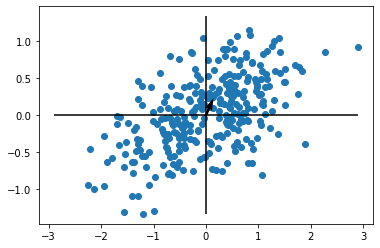

In [53]:
# load the data
DataQ3=spio.loadmat('/Users/akihitomaruya/Desktop/Courses/Class2021/Fall/Math tool for cognitive and neural science/hw2-files/constrainedLS.mat')

# Visualize the raw data 

plt.figure()
plt.scatter(DataQ3['data'][:,0],DataQ3['data'][:,1])
plt.quiver(0,0,DataQ3['w'][0],DataQ3['w'][1])
plt.hlines(0, -max(abs(DataQ3['data'][:,0])), max(abs(DataQ3['data'][:,0])))
plt.vlines(0,-max(abs(DataQ3['data'][:,1])), max(abs(DataQ3['data'][:,1])))

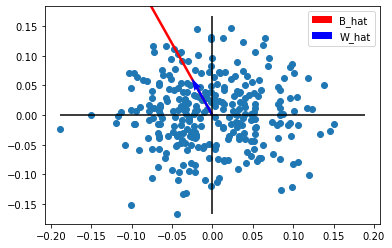

In [54]:
#%% Compute svd and visualize the transformed data, tilde{B}_{opt}, and the transformed weight

D=DataQ3['data'];w=DataQ3['w'];
u, s, vh = np.linalg.svd(D, full_matrices=True)
S=np.zeros(D.shape)
S[:D.shape[1],:D.shape[1]]=np.diag(s)
S_star_inv=np.linalg.pinv(S)[:2,:2];
w_hat=S_star_inv@vh@w
ganma=1/(w_hat.T@w_hat)
B_opt_hat=ganma*w_hat
transformed_data=D@vh.T@S_star_inv

plt.figure()
plt.scatter(transformed_data[:,0],transformed_data[:,1])
plt.hlines(0, -max(abs(transformed_data[:,0])), max(abs(transformed_data[:,0])))
plt.vlines(0,-max(abs(transformed_data[:,1])), max(abs(transformed_data[:,1])))
plt.quiver(0,0,B_opt_hat[0],B_opt_hat[1],color='r',label='B_hat',angles='xy', scale_units='xy', scale=1)
plt.quiver(0,0,w_hat[0],w_hat[1],color='b',label='W_hat',angles='xy', scale_units='xy', scale=1)
plt.legend()

(c) Transform the solution back into the original space.

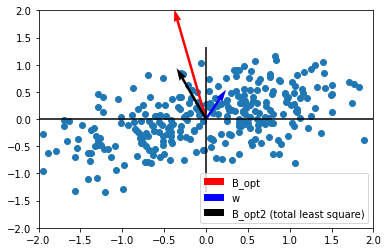

In [57]:
B_opt=vh@S_star_inv@B_opt_hat
# solve for total least square (|u|=1)
B_opt2=vh[:,1];
plt.figure()
plt.scatter(DataQ3['data'][:,0],DataQ3['data'][:,1])
plt.hlines(0, -max(abs(DataQ3['data'][:,0])), max(abs(DataQ3['data'][:,0])))
plt.vlines(0,-max(abs(DataQ3['data'][:,1])), max(abs(DataQ3['data'][:,1])))
plt.quiver(0,0,B_opt[0],B_opt[1],color='r',label='B_opt',angles='xy', scale_units='xy', scale=1)
plt.quiver(0,0,w[0],w[1],color='b',label='w',angles='xy', scale_units='xy', scale=1)
plt.quiver(0,0,B_opt2[0],B_opt2[1],color='k',label='B_opt2 (total least square)',angles='xy', scale_units='xy', scale=1)
plt.axis([-2, 2, -2, 2]) 
plt.legend()

# 4. Dimensionality reduction with PCA.
Professors Hugh Bell and Wi Zell were recording extracellular action potentials (i.e. spikes) from cat primary visual cortex late one evening when their computer malfunctioned. It had already isolated a set of 400 time windows in which voltages had crossed a threshold, indicating the presence of spike. But these traces likely arose from multiple cells, with each cell producing a characteristic waveform, and the computer failed before sorting the voltage traces to determine how many cells were present, and which spikes arose from each cell. The professors come to you (the only math-toolsenabled graduate student still in the building at that hour), asking for help. They provide you with a file windowedSpikes.mat containing a 400 $\times$ 150 matrix, data, whose rows contain
the electrode measurements (voltages recorded for each 150 msec window, at 1msec intervals). Your task is to determine how many neurons produced these 400 spikes.

(a) Plot the 400 waveforms superimposed and describe what you see. Be sure to label your
axes! Using these spike waveform plots, can you devise a way to deduce how many
neurons produced these spikes? Feel free to include an additional plot containing just a
subset of the waveforms in order to aid in your explanation.

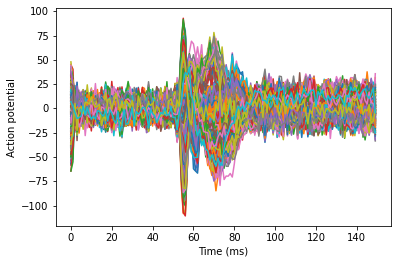

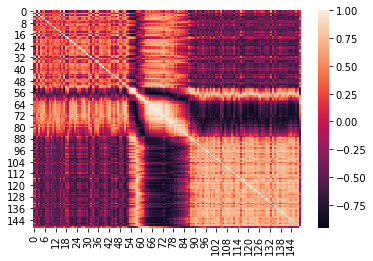

In [58]:
DataQ4=spio.loadmat('/Users/akihitomaruya/Desktop/Courses/Class2021/Fall/Math tool for cognitive and neural science/hw2-files/windowedSpikes.mat')
DataQ4=DataQ4['data']
plt.figure()
plt.plot(np.arange(0,150,step=1).reshape(-1,1),DataQ4.T)
plt.xlabel('Time (ms)')
plt.ylabel('Action potential')
plt.show()
D=DataQ4;
from sklearn.preprocessing import StandardScaler
D_scaled = StandardScaler().fit_transform( D )

# Covariance matrix 

Corr=1/(400)*D_scaled.T@D_scaled

sn.heatmap(Corr, annot=False, fmt='g')
plt.show()
#(a) Count the number of overlap by finding high correlation and subtract from all


(b) Perform principal components analysis (PCA) on your data, and plot the eigenvalues in
descending order (alternatively, compute the SVD of data). It might help to display the
eigenvalues on a log-scale. Interpret what you see.

Text(0, 0.5, 'Explained variance (%)')

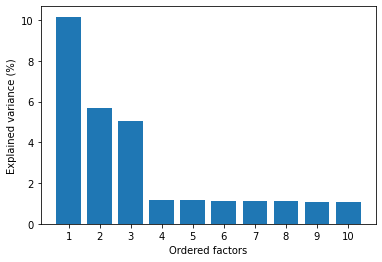

In [59]:

# Compute svd of the data point
# get svd 
u, s, vh = np.linalg.svd(D_scaled, full_matrices=True)
# Plot the eigen value for first ten
plt.figure()
plt.bar(np.arange(1,11,step=1),s[:10]/sum(s)*100)
plt.xticks(np.arange(1,11,step=1))
plt.xlabel('Ordered factors')
plt.ylabel('Explained variance (%)')

(c) Measure the length of the projection of each of the 400 spike waveforms onto the top
two principal components of the dataset, and plot the resulting values as points in
2 dimensions. Describe what you see. Can you deduce how many distinct neurons
produced the 400 voltage traces?

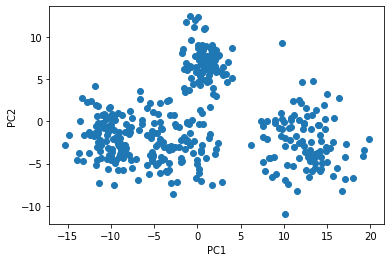

In [60]:
p1=D_scaled@vh[[0],:].T
length_p1=max(p1)-min(p1)
p2=D_scaled@vh[[1],:].T
length_p2=max(p2)-min(p2)
# data is more spread along p1
plt.figure()
plt.scatter(p1,p2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# I see four clusters. So, I think there are four neurons 

(d) Now project each waveform onto the top three principal axes, and plot in 3 dimensions
(you may want to spin it around, using rotate3d in matlab). Are there any signi cant
changes you see? Using the 3D plot, can you inform Drs. Bell and Zell how many
neurons they likely recorded from?

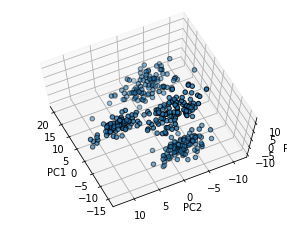

In [64]:
p3=D_scaled@vh[[2],:].T
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=70, azim=154)
ax.scatter(p1, p2, p3,  edgecolor="k")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()
# There is not much difference. So, they likely recorded from four neurons. 
# Let's use KMean cluster to show it is right

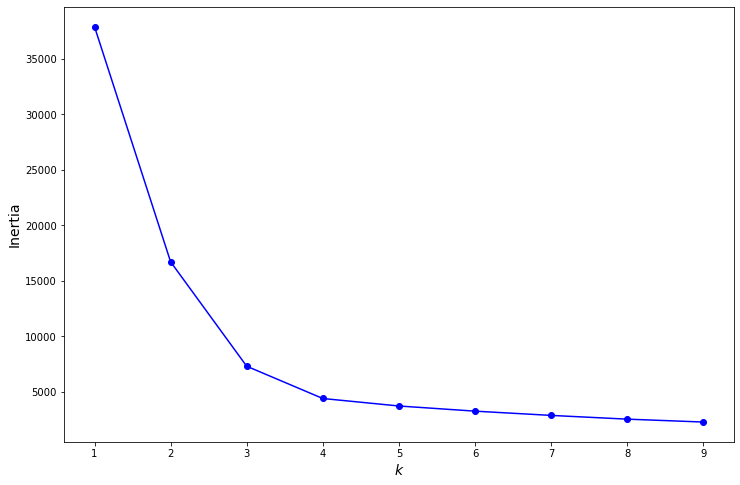

In [65]:
# Conduct KMean cluster and decide how many types of neurons there were
from sklearn.cluster import KMeans
Data_dic={'PC1':p1.reshape(-1),'PC2':p2.reshape(-1)}
Data=pd.DataFrame(Data_dic)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(Data[['PC1','PC2']])
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]


plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

<img src="https://raw.githubusercontent.com/AkihitoM/Final-Project/main/Fig/Fig3.png" width="100%" style="margin-left:auto; margin-right:auto">  

In [1]:
from IPython.display import Video,HTML

In [3]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/Stim_1_Size_1_Speed0.mp4?raw=true" type="video/mp4">
</video>
""")

                                      Rigid Rotation

In [8]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/Stim_1_Size_1_Speed1.mp4?raw=true" type="video/mp4">
</video>
""")

                              Rigid rotation or Non-rigid wobbling

In [9]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/Stim_1_Size_1_Speed2.mp4?raw=true" type="video/mp4">
</video>
""")

                                  Non-rigid wobbling                                            

<img src="https://raw.githubusercontent.com/AkihitoM/Final-Project/main/Fig/Fig4.png" width="100%" style="margin-left:auto; margin-right:auto">  

In [10]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/Stim_1_Size_0_Speed_1_Component.mp4?raw=true" type="video/mp4">
</video>
""")

Motion energy (Component cells) supports percept of wobbling 

In [11]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/Circ ring.mp4?raw=true" type="video/mp4">
</video>
""")

MT pattern cells and feature tracking with saliency tuned support percepts of rotation 

<img src="https://raw.githubusercontent.com/AkihitoM/Final-Project/main/Fig/Fig5.png" width="100%" style="margin-left:auto; margin-right:auto">  

<img src="https://raw.githubusercontent.com/AkihitoM/Final-Project/main/Fig/Fig6.png" width="100%" style="margin-left:auto; margin-right:auto">  

In [35]:
cd /Users/akihitomaruya/Desktop/Courses/Class2021/Fall/Python/DataScience/Final_project/Final_toolbox/

/Users/akihitomaruya/Desktop/Courses/Class2021/Fall/Python/DataScience/Final_project/Final_toolbox


In [38]:
import seaborn as sns

In [30]:
# I made a function which allows you to convert mat file experiment data to pd.DataFrame
# just by passing the observer number
from Convert_mat_to_pd import Ex_rigid_non_rigid
from Convert_mat_to_pd import Ex_rolling, Ex_rigid_non_rigid_for_all_elevation
# load data for Rigid and Non-rigid experiment 
result_all=[Ex_rigid_non_rigid_for_all_elevation(obnum+1) for obnum in range(10)]
# Combine all across observers
Result_all=pd.concat(result_all)
print(Result_all.shape)
Result_all.head()

15 degree data doesnt exist
15 degree data doesnt exist
15 degree data doesnt exist
15 degree data doesnt exist
15 degree data doesnt exist
(18000, 9)


,Response,Size,Speed,Type,Response time,Condition number,Start frame,Counter clockwise rotation,Observer
0,0.0,6 deg,6.0 deg/sec,Circ w gap,1.362,1.0,0.397222,-1.0,1
1,0.0,3 deg,6.0 deg/sec,Oct on vertex,0.893,1.0,0.347222,-1.0,1
2,0.0,3 deg,0.6 deg/sec,Wide ellipse,2.712,1.0,0.138889,1.0,1
3,0.0,3 deg,60.0 deg/sec,Rect on edge,10.924,1.0,0.383333,-1.0,1
4,0.0,6 deg,60.0 deg/sec,Rect on edge,3.654,1.0,0.177778,1.0,1


In [31]:
# Now I would like to compute the probability that people see 
# the cetrain stimuli as non-rigid by aggregating by its size, speed, and type the dataframe
Agg_result=Result_all.groupby(['Size','Speed','Type'])['Response'].mean().reset_index()
Agg_result

,Size,Speed,Type,Response
0,3 deg,0.6 deg/sec,Circ ring,0.280000
1,3 deg,0.6 deg/sec,Circ w gap,0.006667
2,3 deg,0.6 deg/sec,Circ w paint,0.003333
3,3 deg,0.6 deg/sec,Circ wobble,0.283333
4,3 deg,0.6 deg/sec,Long ellipse,0.096667
5,3 deg,0.6 deg/sec,Oct on edge,0.000000
6,3 deg,0.6 deg/sec,Oct on vertex,0.016667
7,3 deg,0.6 deg/sec,Rect on edge,0.010000
8,3 deg,0.6 deg/sec,Rect on vertex,0.000000
9,3 deg,0.6 deg/sec,Wide ellipse,0.163333


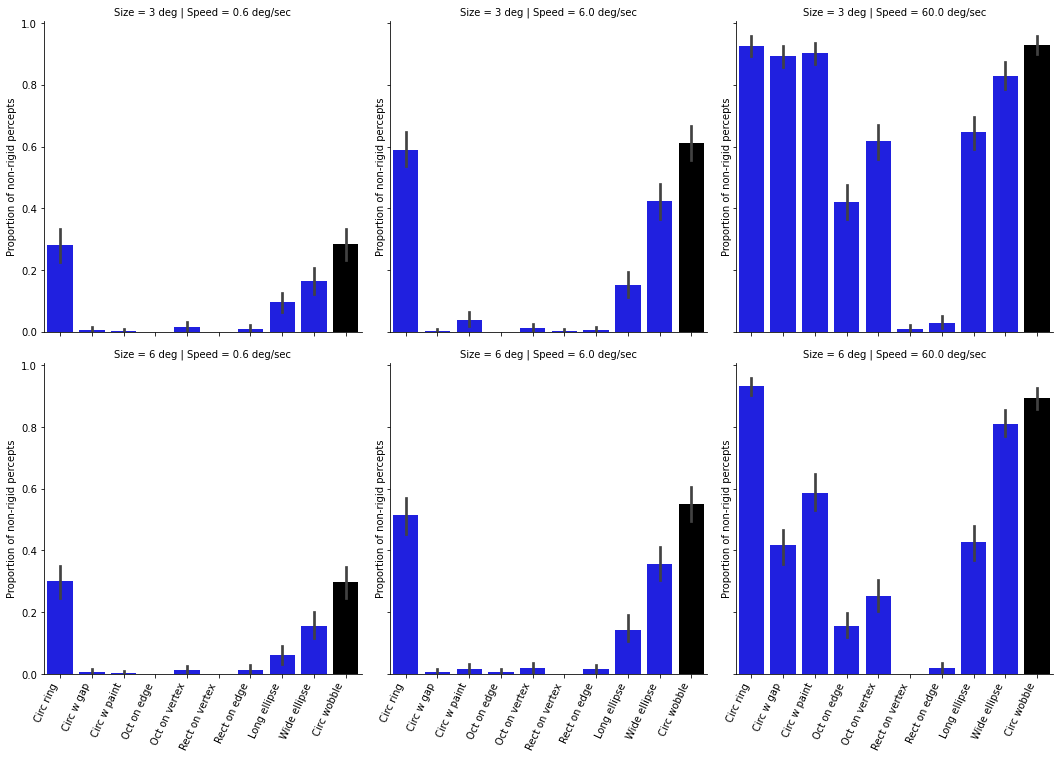

In [39]:
# Plot that 
sns_plot=sns.catplot(data=Result_all,x='Type',y= 'Response',row='Size',col='Speed',kind='bar',
                     row_order=['3 deg','6 deg'],col_order=['0.6 deg/sec','6.0 deg/sec','60.0 deg/sec'],
                     order=['Circ ring','Circ w gap','Circ w paint','Oct on edge','Oct on vertex',
                            'Rect on vertex','Rect on edge','Long ellipse','Wide ellipse',
                            'Circ wobble'],palette=sns.color_palette(['blue', 'blue','blue'
                                                                      ,'blue','blue','blue','blue','blue',
                                                                      'blue','black']))
sns_plot.set_xticklabels(rotation=65, horizontalalignment='right')
sns_plot.set(xlabel=None)
sns_plot.set(ylabel='Proportion of non-rigid percepts')

In [40]:
# I can use pivot the aggregated data to reshape in a way that it is easy 
# to compare the effect of speed/size
# pivot it by size
Agg_result.pivot_table(index=['Type','Speed'],columns=['Size'],values='Response')
# It seems like there is not much difference between two sizes

Size                            3 deg     6 deg
Type           Speed                           
Circ ring      0.6 deg/sec   0.280000  0.300000
               6.0 deg/sec   0.590000  0.513333
               60.0 deg/sec  0.926667  0.933333
Circ w gap     0.6 deg/sec   0.006667  0.006667
               6.0 deg/sec   0.003333  0.006667
               60.0 deg/sec  0.893333  0.416667
Circ w paint   0.6 deg/sec   0.003333  0.003333
               6.0 deg/sec   0.040000  0.016667
               60.0 deg/sec  0.903333  0.586667
Circ wobble    0.6 deg/sec   0.283333  0.296667
               6.0 deg/sec   0.610000  0.550000
               60.0 deg/sec  0.930000  0.893333
Long ellipse   0.6 deg/sec   0.096667  0.060000
               6.0 deg/sec   0.153333  0.143333
               60.0 deg/sec  0.646667  0.426667
Oct on edge    0.6 deg/sec   0.000000  0.000000
               6.0 deg/sec   0.000000  0.006667
               60.0 deg/sec  0.420000  0.156667
Oct on vertex  0.6 deg/sec   0.016667  0.013333
               6.0 deg/sec   0.013333  0.020000
               60.0 deg/sec  0.616667  0.253333
Rect on edge   0.6 deg/sec   0.010000  0.013333
               6.0 deg/sec   0.006667  0.016667
               60.0 deg/sec  0.030000  0.020000
Rect on vertex 0.6 deg/sec   0.000000  0.000000
               6.0 deg/sec   0.003333  0.000000
               60.0 deg/sec  0.010000  0.000000
Wide ellipse   0.6 deg/sec   0.163333  0.156667
               6.0 deg/sec   0.423333  0.356667
               60.0 deg/sec  0.830000  0.810000

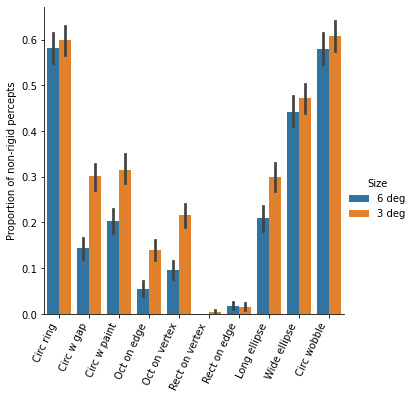

In [41]:
# Visualize it 
sns_plot=sns.catplot(data=Result_all,x='Type',y= 'Response',hue='Size',kind='bar',
                     order=['Circ ring','Circ w gap','Circ w paint','Oct on edge','Oct on vertex',
                            'Rect on vertex','Rect on edge','Long ellipse','Wide ellipse',
                            'Circ wobble'])
sns_plot.set_xticklabels(rotation=65, horizontalalignment='right')
sns_plot.set(xlabel=None)
sns_plot.set(ylabel='Proportion of non-rigid percepts')

    It seems like there is not much effect of size on the perception of non-rigidity.

In [42]:
# Let's see the effect of speed
Agg_result.pivot_table(index=['Type','Size'],columns=['Speed'],values='Response').reset_index()
# Regardless of the shape (except for rectangle) and the size, there are huge jump from
# low speed to high speed

Speed,Type,Size,0.6 deg/sec,6.0 deg/sec,60.0 deg/sec
0,Circ ring,3 deg,0.280000,0.590000,0.926667
1,Circ ring,6 deg,0.300000,0.513333,0.933333
2,Circ w gap,3 deg,0.006667,0.003333,0.893333
3,Circ w gap,6 deg,0.006667,0.006667,0.416667
4,Circ w paint,3 deg,0.003333,0.040000,0.903333
5,Circ w paint,6 deg,0.003333,0.016667,0.586667
6,Circ wobble,3 deg,0.283333,0.610000,0.930000
7,Circ wobble,6 deg,0.296667,0.550000,0.893333
8,Long ellipse,3 deg,0.096667,0.153333,0.646667
9,Long ellipse,6 deg,0.060000,0.143333,0.426667


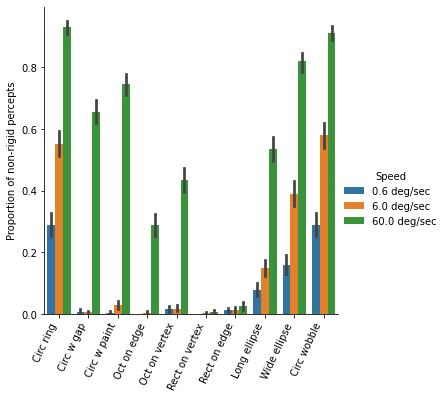

In [43]:
sns_plot=sns.catplot(data=Result_all,x='Type',y= 'Response',hue='Speed',kind='bar',
                     order=['Circ ring','Circ w gap','Circ w paint','Oct on edge','Oct on vertex',
                            'Rect on vertex','Rect on edge','Long ellipse','Wide ellipse',
                            'Circ wobble'],hue_order=['0.6 deg/sec','6.0 deg/sec','60.0 deg/sec'])
sns_plot.set_xticklabels(rotation=65, horizontalalignment='right')
sns_plot.set(xlabel=None)
sns_plot.set(ylabel='Proportion of non-rigid percepts')

                    There is a big effect of speed on the percept of non-rigidity 

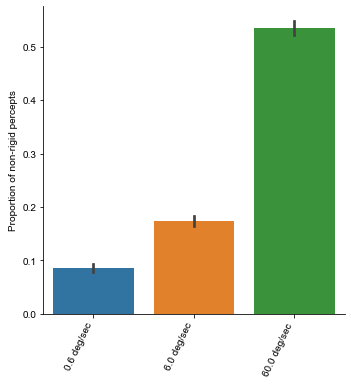

In [44]:
# Let's look at only speed effect.
sns_plot=sns.catplot(data=Result_all,x='Speed',y= 'Response',kind='bar',
                     order=['0.6 deg/sec','6.0 deg/sec','60.0 deg/sec'])
sns_plot.set_xticklabels(rotation=65, horizontalalignment='right')
sns_plot.set(xlabel=None)
sns_plot.set(ylabel='Proportion of non-rigid percepts')
sns.set(rc={'figure.figsize':(11.7,8.27)})

        Does our prelimilary explanation explain the effect of the size on our percepts?

<img src="https://raw.githubusercontent.com/AkihitoM/Final-Project/main/Fig/Fig7.jpg" width="100%" style="margin-left:auto; margin-right:auto">  

To test this, I trained a CNN with optical flow patterns, either rotation or wobbling and passed the velocity fields from the component cells and the pattern cells to see if what the CNN reports.

## This code allows you to make the dataset as well as the visualization of the stimulus.

In [49]:
cd /Users/akihitomaruya/Desktop/Project/Project2021/Tire/Tire_toolbox_for_py/

/Users/akihitomaruya/Desktop/Project/Project2021/Tire/Tire_toolbox_for_py


In [50]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 19 14:24:43 2021

@author: akihitomaruya
"""


import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
from math import atan2, degrees
from Tool_box import Projection,Projection_fromXYZ
from basic_units import cm, inch
import os


class RandomDotStim(object):
    
    def __init__(self,num_frame,CElevation,NumDots,rolling_ratio,color_line='k',color=['w'],face_color=[.5,.5,.5],contrast=1,distance=100,deg_sec=np.array([[6]])):
        """
        Distance by defalt is 100cm
        deg_per_sec is a speed of the stimuli when the junction isfacing towards you
        num_frame is the number of frames in a video (1000 for .6 deg/sec, 200 for 6 deg/sec, and 30 
                                                      for 60 deg/sec were used)
        CElevation: Camera elevation for the stimuli 
        NumDots: The number of Dots
        rolling_ratio: Controls the amount of wobble (1) or spinning(2) 
        Returns
        -------
        None.

        """
        self.face_color=face_color
        self.color_line=color_line;
        self.contrast=contrast
        self.color=color
        self.fv=1.7 # focal length of eye is set to 1.7cm
        self.fc=distance # focal length of camera is set to equate the distance
        self.deg_sec=deg_sec
        # deg per frame 
        deg_per_frame=360/num_frame;
        self.num_frame=num_frame
        # Expected size in degrees
        size_deg=np.array([[3]]); 
        self.size_deg=size_deg
        angle=90; PhiE=30; Cel=CElevation;
        # Size in cm
        size_cm=2*np.tan(size_deg/180*np.pi)*distance;
        self.size_cm=size_cm
        FPS_all=[];
        # Here, only think about FPS for 1 deg per sec. Because once determined, I can just reduce the number of frames.
        for sz in range(len(size_cm)):
            x1,y1,z1,d1,u1,v1=Projection(size_cm[sz]/2,0,angle,PhiE,Cel,0,size_cm[sz]*np.sin(PhiE/180*np.pi),0,0,0)
            x2,y2,z2,d2,u2,v2=Projection(size_cm[sz]/2,0,angle+deg_per_frame,PhiE,Cel,0,size_cm[sz]*np.sin(PhiE/180*np.pi),0,0,0)
            linear_v=np.sqrt((u1-u2)**2+(v1-v2)**2)
            #print(linear_v)
            dev=np.sqrt((u1**2+v1**2))#deviation from center
            #print(dev)
            dis=np.sqrt(dev**2+distance**2)
            #print(dis)
            FPS_all_speed=np.zeros(len(deg_sec));
            # determine deg for linear_v
            for sp in range(len(deg_sec)):
                deg=2*degrees(atan2(linear_v[sp]/2,distance));
            #print(deg)
                time=deg/deg_sec[sp]
                fps=round(1/time[0])
                FPS_all_speed[sp]=fps
            FPS_all.append(FPS_all_speed)
        self.FPS_all=FPS_all
        self.CElevation=CElevation
        width=1920; # num pix on width and height
        height=1080;
        diag=np.sqrt(width**2+height**2); # num pixel in diagonal
        pixel_per_cm=1/(24*2.54/diag)
        self.size_pixels=size_cm*pixel_per_cm
        self.NumDots=NumDots
        self.rolling_ratio=rolling_ratio
        self.Rrate=rolling_ratio
        
    def MakeVideos(self):
        """
        Make videos by passing the arguments

        Returns
        -------
        None.

        """
        for sz in range(len(self.size_cm)):
            for sp in range(len(self.deg_sec)):
                U,V=self.project(sz,sp)
                self.DrawIm(sz,sp,U,V)
                self.MakeV(sz,sp)
    def project(self,size_int=0,speed_int=0):
        """

        Parameters
        ----------
        size_int : TYPE
            DESCRIPTION.
        speed_int : TYPE
            DESCRIPTION.

        Returns
        U,V

        """
        X=np.random.uniform(-self.size_cm[size_int]*2,self.size_cm[size_int]*2,int(self.NumDots/2));
        YT=np.random.uniform(0,self.size_cm[size_int]*2,int(self.NumDots/2)); YB=np.random.uniform(-self.size_cm[size_int]*2,0,int(self.NumDots/2));
        Z=np.random.uniform(-self.size_cm[size_int]*2,self.size_cm[size_int]*2,int(self.NumDots/2));
        Deg=self.num_frame[speed_int];PhiE=np.random.uniform(-50,50); PhiC=self.CElevation;Az=0; 
        nsample=self.NumDots
        U_all=[];V_all=[]; init_angle=np.random.uniform(0,359);
        for tt in range(int(Deg[0])):
            UT=np.empty((int(nsample/2),1));UT[:]=np.nan;
            VT=np.empty((int(nsample/2),1));VT[:]=np.nan
            UB=np.empty((int(nsample/2),1));UB[:]=np.nan;
            VB=np.empty((int(nsample/2),1));VB[:]=np.nan
            for ii in range(int(nsample/2)):
                r_ratio=self.rolling_ratio
                if r_ratio[0]!=0:
                    r_ratio=[1]
                else:
                    r_ratio=[0]
                u,v=Projection_fromXYZ(X[ii],YT[ii],Z[ii],360/199*(tt+init_angle),PhiE,PhiC,Az,r_ratio)
                UT[ii]=u
                VT[ii]=v
                u,v=Projection_fromXYZ(X[ii],YB[ii],Z[ii],360/199*(tt+init_angle),-PhiE,PhiC,Az,r_ratio)
                UB[ii]=u
                VB[ii]=v
                U=np.append(UT,UB,axis=0)
                V=np.append(VT,VB,axis=0)
            U_all.append(U)
            V_all.append(V)
        return U_all,V_all
        
                
    def DrawIm(self,size_int,speed_int,U,V):
        """
        Here, I draw a image based on the passed arguments 

        Returns
        -------
        None.

        """
        self.sfile=f'/Users/akihitomaruya/Desktop/Project/Project2021/Tire/Random_Dot/Rrate{self.Rrate}_Size{self.size_deg[size_int]}_Speed{self.deg_sec[speed_int]}/'
        self.vfile=f'/Users/akihitomaruya/Desktop/Project/Project2021/Tire/Random_Dot/Videos/'
        try:
            os.mkdir(self.sfile)
        except:
            print('File exists')
        
        try:
            os.mkdir(self.vfile)
        except:
            print('Vfile exists')
        self.name=f'Rrate{self.Rrate}_Size{self.size_deg[size_int]}_Speed{self.deg_sec[speed_int]}'
        Deg=self.num_frame[speed_int];
       
#%% plot the rings at each frame 
        for tt in range(int(Deg[0])):
          
            # ## Plot
            my_dpi=100;S=self.size_pixels[size_int]
            fig=plt.figure(figsize=(round(S[0],-1)/my_dpi, round(S[0],-1)/my_dpi), dpi=my_dpi)
            fig.patch.set_facecolor(self.face_color)
            plt.plot(U[tt],V[tt],'ok')
            
        
            plt.axis('off')
            plt.xlim(-((self.size_cm[size_int]-self.size_cm[size_int]/3))*cm,((self.size_cm[size_int])-self.size_cm[size_int]/3)*cm)
            plt.ylim(-((self.size_cm[size_int])-self.size_cm[size_int]/3)*cm,((self.size_cm[size_int])-self.size_cm[size_int]/3)*cm)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.draw()
            
            if tt<10:
                sname=self.sfile+self.name+f'_0000{tt}.jpg'
            elif tt>99 and tt<1000:
                sname=self.sfile+self.name+f'_00{tt}.jpg'
            elif tt>999:
                sname=self.sfile+self.name+f'_0{tt}.jpg'
            elif tt>9999:
                sname=self.sfile+self.name+f'_{tt}.jpg'
            else:
                sname=self.sfile+self.name+f'_000{tt}.jpg'
            fig.savefig(sname,facecolor=fig.get_facecolor())
            plt.close('all')
        
        # #%% save u and v
        # mdic={'U':U,'V':V,'Omega':Omega,'label': 'position'}
        # savemat('/Users/akihitomaruya/Desktop/Project/Project2021/Tire/StimMat/'+name+'.mat',mdic)
 
    def MakeV(self,sz,ss):
        image_folder = self.sfile
                
        video_name = self.vfile+ self.name+f".mp4"
        import os
        import moviepy.video.io.ImageSequenceClip
        
        fps=self.FPS_all[sz][ss]
        
        image_files = [image_folder+'/'+img for img in sorted(os.listdir(image_folder)) if img.endswith(".jpg")]
        clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
        clip.write_videofile(video_name) 
 
        
        

In [12]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/RotationEx.mp4?raw=true" type="video/mp4">
</video>
""")

In [13]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/WobbleEx.mp4?raw=true" type="video/mp4">
</video>
""")

<img src="https://raw.githubusercontent.com/AkihitoM/Final-Project/main/Fig/Fig8.png" width="500%" style="margin-left:auto; margin-right:auto">  

CNN can correctly classify the optical flow patterns of the rotation and the wobbling. 

In [55]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.io
import os
from CNNRingsToolBox import create_model
import seaborn as sn
import h5py
import mat73
def ConvertData(Data2):
    Data2_new=np.zeros((np.size(Data2,axis=2),200,200,2))
    for tt in range(np.size(Data2,axis=2)):
        Data2_new[tt,:,:,0]=Data2[:,:,tt,0]
        Data2_new[tt,:,:,1]=Data2[:,:,tt,1]
    return Data2_new
def EvaluateModel(Data):
    predict=model2(Data)
    pro=np.argmax(predict,axis=1)
    probability=sum(pro)/len(pro)
    return probability
#%% load model 
# Create a new model instance
model2 = create_model()
checkpoint_path = "/Users/akihitomaruya/Desktop/Project/Project2021/Tire/Random_Dot/CNN-Rings"
# Restore the weights
model2.load_weights(checkpoint_path)

#%% load mat data
Size=0;speed=1;
stim_num=[1,2,3,4,5,6,11,12,13,14]; pro_comp=np.zeros((len(stim_num),1));pro_IOC=np.zeros((len(stim_num),1))
pro_feature=np.zeros((len(stim_num),1));
stim_name=['Circ ring','Circ w gap','Circ w paint','Oct on edge','Oct on vertex','Circ wobble','Rect on edge','Rect on vertex','Long ellipse','Wide ellipse'];
for ss in range(len(stim_num)):
    name=f'/Users/akihitomaruya/Desktop/Project/Project2021/Tire/Component_cell_mat/Stim_{stim_num[ss]}_Size_{Size}_Speed_{speed}_reduced2.mat'
    mat = scipy.io.loadmat(name)
    #%% Component cells
    Data2=mat['Data']
    Data_comp= ConvertData(Data2)
    pro_comp[ss]=EvaluateModel(Data_comp)
    
    # #%% IOC
    # name=f'/Users/akihitomaruya/Desktop/Project/Project2021/Tire/Pattern_cell_mat/Stim_{stim_num[ss]}_Size_{Size}_Speed_{speed}_shape_prior_0.1_CNN.mat'
    # mat = scipy.io.loadmat(name)
    # DataIOC=mat['Data_new']
    # DataIOC= ConvertData(DataIOC)
    # pro_IOC[ss]=EvaluateModel(DataIOC)
    
    #%% Feature Tracking
    name=f'/Users/akihitomaruya/Desktop/Project/Project2021/Tire/F_IOC_Tracking/'+stim_name[ss]+'.mat'
    mat=scipy.io.loadmat(name)
    DataF=mat['Combined']
    DataF=ConvertData(DataF)
    pro_feature[ss]=EvaluateModel(DataF)
#proF=(pro_feature+pro_IOC)/2
    #%% vis
    # x=np.linspace(-10, 10, num=200)
    # y=x
    # X, Y = np.meshgrid(x, y)
    # plt.figure()
    # plt.quiver(X,Y,DataIOC[15,:,:,0],DataIOC[15,:,:,1])
    # plt.show()
    

Feed the preferred directions for the component cells and the pattern cells (feature tracking).

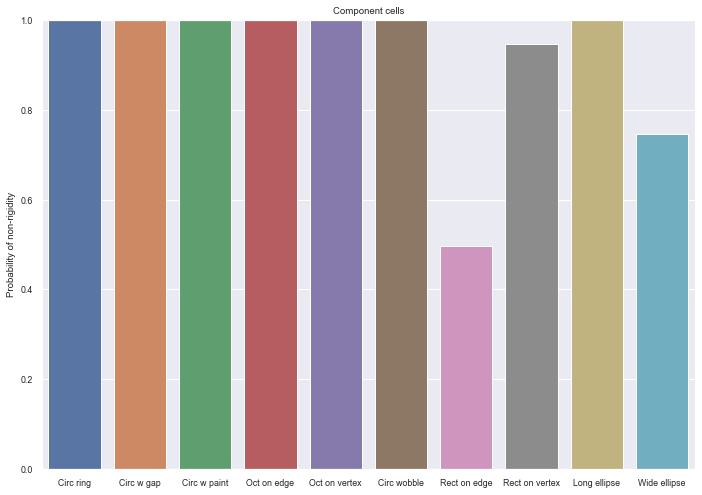

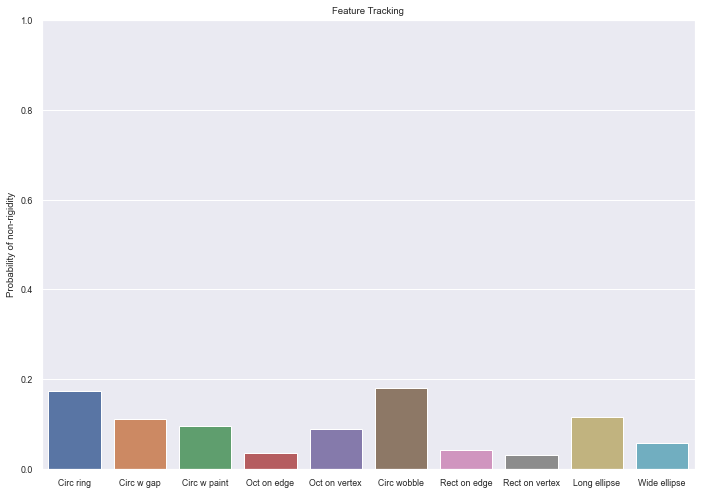

In [56]:
#%% Plot
sn.set(font_scale = .8)
sn.barplot(stim_name,pro_comp.reshape(-1))
plt.ylim(0,1)
plt.ylabel('Probability of non-rigidity')
plt.title('Component cells')
plt.show()

# sn.set(font_scale = .4)
# sn.barplot(stim_name,pro_IOC.reshape(-1))
# plt.ylim(0,1)
# plt.ylabel('Probability of non-rigidity')
# plt.title('Pattern cells')
# plt.show()

sn.barplot(stim_name,pro_feature.reshape(-1))
plt.ylim(0,1)
plt.ylabel('Probability of non-rigidity')
plt.title('Feature Tracking')
plt.show()

As expected, the velocity fields for the component cells show higher probability of non-rigidity, whereas the feature tracking provides the percept of rigidity. 

In [18]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/Grating_mod_plaid_half90oriented45frate_5.mp4?raw=true" type="video/mp4">
</video>
""")

In [19]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/Grating_mod_plaid_half90oriented45frate_60.mp4?raw=true" type="video/mp4">
</video>
""")

Motion energy won't capture the wobbling motion, but the feature tracking does. 

In [20]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/Stim_1_Size_0_Speed_0Noise.mp4?raw=true" type="video/mp4">
</video>
""")

In [22]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/Stim_1_Size_0_Speed_1Noise.mp4?raw=true" type="video/mp4">
</video>
""")

Degrading shape information at the slow speed makes the stimulus invisible, showing that at the slow speed, the information of the shape or feature tracking is a major factor.

In [57]:
sfileC='/Users/akihitomaruya/Desktop/Project/Project2021/Tire/CNN_output/pro_comp.npy'
pro_comp=np.load(sfileC)
wobble=pro_comp[5]
pro_comp=np.delete(pro_comp,5,0)
pro_comp=np.append(pro_comp,wobble)
sfileF='/Users/akihitomaruya/Desktop/Project/Project2021/Tire/CNN_output/pro_feature.npy'
pro_feature=np.load(sfileF)
wobble=pro_feature[5]
pro_feature=np.delete(pro_feature,5,0)
pro_feature=np.append(pro_feature,wobble)

In [59]:
#%% Make dataset
order=['Circ ring','Circ w gap','Circ w paint','Oct on edge','Oct on vertex',
                            'Rect on vertex','Rect on edge','Long ellipse','Wide ellipse',
                            'Circ wobble']

    
    
Result_by_speed=Result_all.groupby('Speed')['Response'].mean()


comp_mean=np.mean(pro_comp)
F_mean=np.mean(pro_feature)
weight=np.zeros((3,1))
prediction=np.zeros((3))
for ss in range(3):
    weight[ss]=(Result_by_speed[ss]-comp_mean)/(F_mean-comp_mean)
    prediction[ss]=weight[ss]*F_mean+(1-weight[ss])*comp_mean

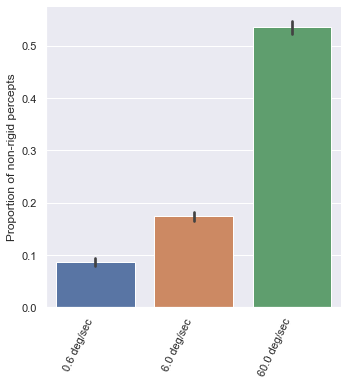

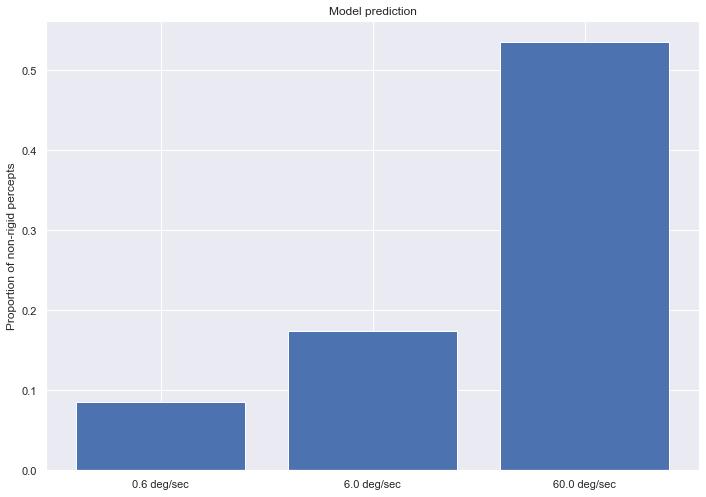

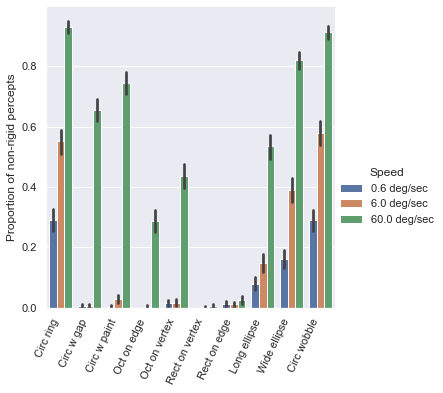

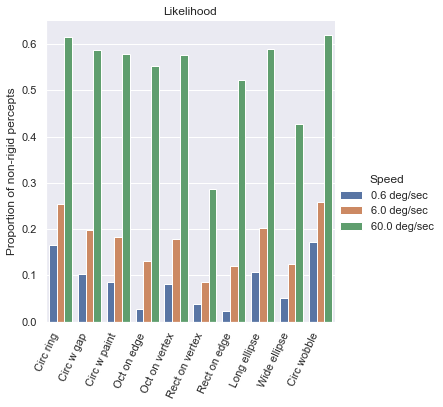

In [80]:
sns_plot=sns.catplot(data=Result_all,x='Speed',y= 'Response',kind='bar',
                     order=['0.6 deg/sec','6.0 deg/sec','60.0 deg/sec'])
sns_plot.set_xticklabels(rotation=65, horizontalalignment='right')
sns_plot.set(xlabel=None)
sns_plot.set(ylabel='Proportion of non-rigid percepts')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.figure()
plt.bar(['0.6 deg/sec','6.0 deg/sec','60.0 deg/sec'],prediction)
plt.ylabel('Proportion of non-rigid percepts')
plt.title('Model prediction')
Speed=['0.6 deg/sec','6.0 deg/sec','60.0 deg/sec']
Measurements=pro_feature*weight+(1-weight)*pro_comp
Measurements_all=[];
for ss in range(len(Measurements)):
    dict_measurements={'Probability': Measurements[ss],'Type': order}
    Measurements_pd=pd.DataFrame(dict_measurements)
    Measurements_pd['Speed']=Speed[ss]
    Measurements_all.append(Measurements_pd)
    
Likelihood=pd.concat(Measurements_all)

sns_plot=sns.catplot(data=Result_all,x='Type',y= 'Response',hue='Speed',kind='bar',
                     order=['Circ ring','Circ w gap','Circ w paint','Oct on edge','Oct on vertex',
                            'Rect on vertex','Rect on edge','Long ellipse','Wide ellipse',
                            'Circ wobble'],hue_order=['0.6 deg/sec','6.0 deg/sec','60.0 deg/sec'])
sns_plot.set_xticklabels(rotation=65, horizontalalignment='right')
sns_plot.set(xlabel=None)
sns_plot.set(ylabel='Proportion of non-rigid percepts')


sns_plot=sns.catplot(data=Likelihood,x='Type',y= 'Probability',hue='Speed',kind='bar',
                     order=['Circ ring','Circ w gap','Circ w paint','Oct on edge','Oct on vertex',
                            'Rect on vertex','Rect on edge','Long ellipse','Wide ellipse',
                            'Circ wobble'],hue_order=['0.6 deg/sec','6.0 deg/sec','60.0 deg/sec'])
sns_plot.set_xticklabels(rotation=65, horizontalalignment='right')
sns_plot.set(xlabel=None)
sns_plot.set(ylabel='Proportion of non-rigid percepts')
sns_plot.set(title='Likelihood')
plt.show()

Although the model explains the effect of the speed well, it is not sufficient to elucidate the effect of the shape. 

In [82]:
# Load the rolling experiment
result_all2=[Ex_rolling(obnum+1) for obnum in range(10)]
Result_all2=pd.concat(result_all2)

#%% Plot 
# Ex1 rotation
Result_ring_rotation=Result_all[Result_all['Type']=='Circ ring'][['Response','Speed']]
Result_ring_rotation['Experiment number']='Experiment1'
Result_ring_rotation['Type']='Rotation'
Result_ring_rotation['Question']='Rigid'
Result_ring_rotation['Response']=1-Result_ring_rotation['Response']
# Ex1 wobbling
Result_ring_wobble=Result_all[Result_all['Type']=='Circ wobble'][['Response','Speed']]
Result_ring_wobble['Experiment number']='Experiment1'
Result_ring_wobble['Type']='Wobbling'
Result_ring_wobble['Question']='Rigid'
Result_ring_wobble['Response']=1-Result_ring_wobble['Response']

# Ex2 rotation
Result2_ring_rotation=Result_all2[Result_all2['Stim_type']=='NR'][['Response','Speed','Question']]
Result2_ring_rotation['Experiment number']='Experiment2'
Result2_ring_rotation['Type']='Rotation'

# Ex2 wobbling
Result2_ring_wobble=Result_all2[Result_all2['Stim_type']=='NW'][['Response','Speed','Question']]
Result2_ring_wobble['Experiment number']='Experiment2'
Result2_ring_wobble['Type']='Wobbling'


#%% combine all
Results_Ex12=pd.concat([Result_ring_rotation,Result_ring_wobble,Result2_ring_rotation,Result2_ring_wobble])

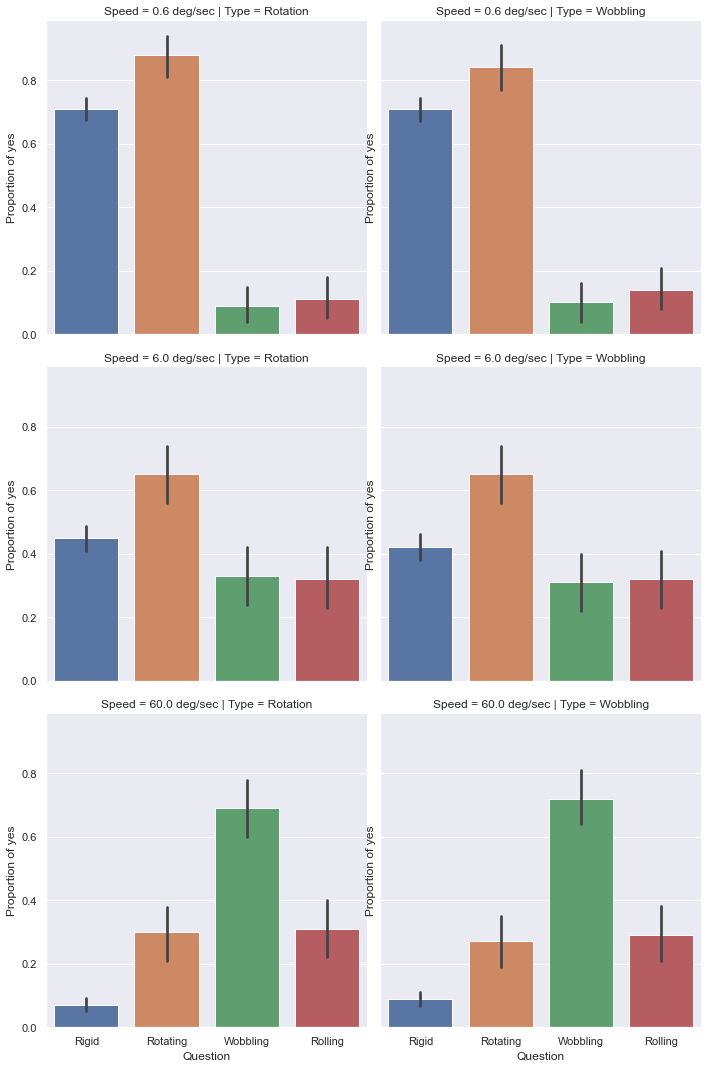

In [83]:
# Plot them
sns_plot=sns.catplot(data=Results_Ex12,x='Question',y= 'Response',row='Speed',kind='bar',col='Type',
                     row_order=['0.6 deg/sec','6.0 deg/sec','60.0 deg/sec'],order=['Rigid','Rotating','Wobbling','Rolling'])

sns_plot.set(ylabel='Proportion of yes')

Interestingly, sometimes people see the ring illusion as rolling despite that there is no sensory evidence that it is rolling. Does prior knowledge influence our percepts? Intuitively, we often see that a circular shape wobbles or rolls, but not square shape. Does the shape constrain the frequency of occurrance in wobbling or rolling? 

# Physics engine to simulate how easy it is to wobble depending on the shape. 

In [88]:
HTML("""
<video width="500" height="500" controls>
  <source src="https://github.com/AkihitoM/Final-Project/blob/main/Fig/Stim_1_Size_0_Speed_1Noise.mp4?raw=true" type="video/mp4">
</video>
""")

## Incorporating this to the prior over wobbling given shape, I derived its posterior.

In [101]:
Result_by_speed_and_type=Result_all.groupby(['Speed','Type']).mean()

Ratio=[11,11,11,3,3,2,2,10,10,11]
import numpy.matlib
Ratio=numpy.matlib.repmat(Ratio,3,1).reshape(-1)
def posterior(R):
  return lambda c : c*R*Measurements.reshape(-1)/np.sum(R*Measurements.reshape(-1))


C=np.arange(0,40,step=.1)
MSE=np.zeros((len(C),1))
for ii in range(len(C)):
    MSE[ii]=np.sum((posterior(Ratio)(C[ii])-Result_by_speed_and_type['Response'].values)**2)/len(Result_by_speed_and_type['Response'].values)

ind_min=np.where(MSE==min(MSE))

Posterior_opt=posterior(Ratio)(C[ind_min[0]])
Prior=C[ind_min[0]]*Ratio/np.sum(Ratio)


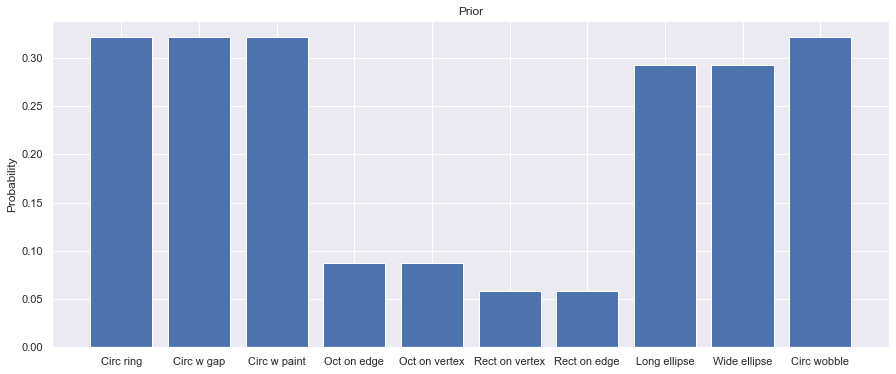

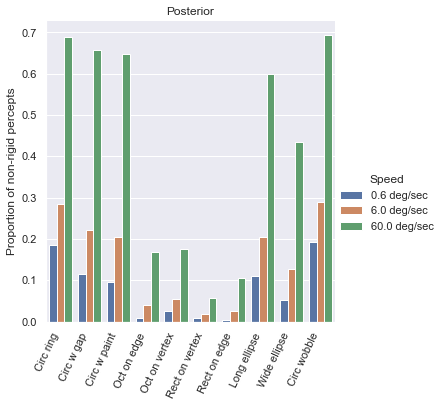

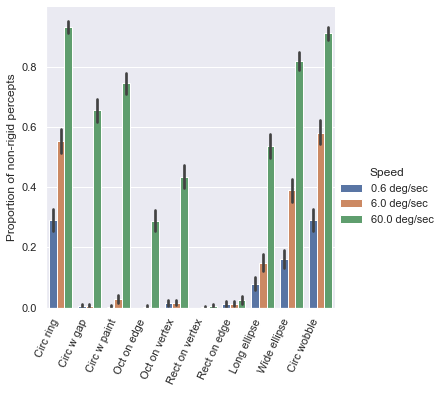

In [103]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(order,Prior[:10])
plt.ylabel('Probability')
plt.title('Prior')


Posterior={'Probability':Posterior_opt}
Posterior_pd=pd.DataFrame(Posterior)
Posterior_pd['Speed']=Likelihood['Speed'].values
Posterior_pd['Type']=Likelihood['Type'].values

sns_plot=sns.catplot(data=Posterior_pd,x='Type',y= 'Probability',hue='Speed',kind='bar',
                     order=['Circ ring','Circ w gap','Circ w paint','Oct on edge','Oct on vertex',
                            'Rect on vertex','Rect on edge','Long ellipse','Wide ellipse',
                            'Circ wobble'],hue_order=['0.6 deg/sec','6.0 deg/sec','60.0 deg/sec'])
sns_plot.set_xticklabels(rotation=65, horizontalalignment='right')
sns_plot.set(xlabel=None)
sns_plot.set(ylabel='Proportion of non-rigid percepts')
sns_plot.set(title='Posterior')


sns_plot=sns.catplot(data=Result_all,x='Type',y= 'Response',hue='Speed',kind='bar',
                     order=['Circ ring','Circ w gap','Circ w paint','Oct on edge','Oct on vertex',
                            'Rect on vertex','Rect on edge','Long ellipse','Wide ellipse',
                            'Circ wobble'],hue_order=['0.6 deg/sec','6.0 deg/sec','60.0 deg/sec'])
sns_plot.set_xticklabels(rotation=65, horizontalalignment='right')
sns_plot.set(xlabel=None)
sns_plot.set(ylabel='Proportion of non-rigid percepts')